In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import flywheel

In [41]:
fw = flywheel.Client()
project_id = '5e50277c6dea314fa72a7440'
project = fw.get(project_id)
subjects = [fw.get_subject(x.id) for x in fw.get_project_subjects(project_id)]

In [43]:
# initialize target columns
row_list = []
for subject in subjects:
    if subject.info and subject.sex:
        sex = subject.sex
        hb = subject.info['Hb']
        row = [subject.label, hb, sex]
        row_list.append(row)


df = pd.DataFrame(row_list,columns=['subject_label','Hb','sex'])
df.head()

,subject_label,Hb,sex
0,HC001,14.6,male
1,HC002,12.1,male
2,HC003,13.7,female
3,HC004,13.1,male
4,HC005,12.2,male


In [ ]:
## Plot data

Text(0.5, 1.0, 'Distribution of Hb measurements')

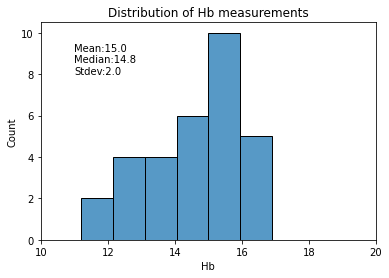

In [47]:
# get mean, median, std of Hb values
mean_hb = np.round(np.mean(df.Hb))
median_hb = np.median(df.Hb)
std_hb = np.round(np.std(df.Hb))

ax = sns.histplot(data=df, x='Hb')
ax.set_xlim(10,20)
ax.text(11,8,'Mean:{}\nMedian:{}\nStdev:{}'.format(mean_hb, median_hb, std_hb))
ax.set_title('Distribution of Hb measurements')

Text(0.5, 1.0, 'Hb measurements by sex')

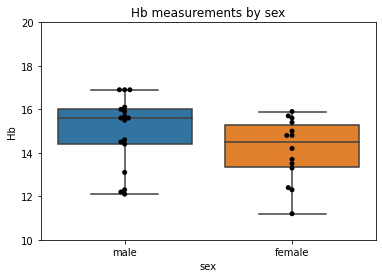

In [45]:
ax2 = sns.boxplot(data=df, x='sex',y='Hb')
ax2 = sns.swarmplot(data=df, x='sex',y='Hb',color="k")
ax2.set_ylim(10,20)
ax2.set_title("Hb measurements by sex")

## Get 10 lowest and 10 highest Hb subjects

In [217]:
dm_df = pd.read_csv('refined_dM.csv')
dm_df_sort = dm_df.sort_values('Hb')
dm_df_sort.head()

,session_id,left_acc,right_acc,left_insula,right_insula,left_caudate,right_caudate,left_putamen,right_putamen,Hb,T1a
18,sub-HC007_ses-MR_BASELINE_,"[0.012947, 0.014247, 0.010509, 0.012478, 0.008...","[0.020386, 0.020983, 0.018032, 0.019553, 0.014...","[0.030822, 0.018815, 0.018875, 0.016115, 0.018...","[0.019831, 0.012137, 0.010686, 0.008576, 0.010...","[0.014813, 0.007933, 0.007723, 0.005526, 0.007...","[0.007361, 0.008266, 0.006461, 0.006795, 0.006...","[0.021003, 0.013166, 0.011982, 0.009477, 0.011...","[0.010606, 0.009629, 0.004849, 0.007896, 0.003...",11.2,3.733333
17,sub-HC007_ses-MR_FOLLOWUP_,"[0.022474, 0.020742, 0.011834, 0.017522, 0.009...","[0.038628, 0.033203, 0.021578, 0.027833, 0.012...","[0.050387, 0.03817, 0.027981, 0.017505, 0.0240...","[0.024281, 0.01918, 0.013129, 0.013372, 0.0024...","[0.015942, 0.013766, 0.005693, 0.009218, 0.003...","[0.017484, 0.006343, 0.010259, 0.004595, 0.002...","[0.028819, 0.022333, 0.012038, 0.018381, 0.005...","[0.01992, 0.015534, 0.010413, 0.012196, 0.0030...",11.2,3.733333
12,sub-HC002_ses-MR_FOLLOWUP_,"[0.01077, 0.012116, 0.011771, 0.010188, 0.0083...","[0.02189, 0.012947, 0.01367, 0.008224, 0.00716...","[0.018904, 0.012151, 0.011821, 0.006437, 0.006...","[0.011398, 0.010182, 0.008237, 0.00623, 0.0051...","[0.004513, 0.005275, 0.00447, 0.004958, 0.0039...","[0.007157, 0.00831, 0.00268, 0.002958, nan, na...","[0.012517, 0.01025, 0.009484, 0.006267, 0.0070...","[0.008225, 0.007669, 0.005407, 0.004697, nan, ...",12.1,4.033333
3,sub-HC005_ses-MR_BASELINE_,"[0.018733, 0.01589, 0.016105, 0.010888, 0.0061...","[0.031663, 0.02857, 0.015934, 0.012519, 0.0190...","[0.036091, 0.025892, 0.025746, 0.015231, 0.018...","[0.019381, 0.01547, 0.013939, 0.008559, 0.0099...","[0.011655, 0.00766, 0.008451, 0.002607, 0.0041...","[0.015198, 0.017022, 0.006108, 0.009595, 0.012...","[0.023518, 0.016264, 0.016129, 0.009709, 0.011...","[0.014624, 0.012972, 0.005553, 0.006608, 0.006...",12.2,4.066667
4,sub-HC005_ses-MR_FOLLOWUP_,"[0.014037, 0.013615, 0.010713, 0.010969, 0.006...","[0.026697, 0.016468, 0.022111, 0.015841, 0.018...","[0.023055, 0.017518, 0.022484, 0.019574, 0.015...","[0.017159, 0.012052, 0.009199, 0.009033, 0.007...","[0.008996, 0.006992, 0.004457, 0.006584, 0.003...","[0.009622, 0.014576, 0.013216, 0.011953, nan, ...","[0.012178, 0.010195, 0.010964, 0.007989, 0.007...","[0.008361, 0.009407, 0.00565, 0.004521, nan, n...",12.2,4.066667


In [228]:
dm_df_sort.shape

(48, 11)

In [257]:
low_df = dm_df_sort[0:20] # want lowest 10, but there are 2 sessions per subject
low_df.insert(loc=1, column='group',value=['low'] * 20)
high_df = dm_df_sort[-20:]
high_df.insert(loc=1, column='group',value=['high'] * 20)

filt_df = high_df.append(low_df, ignore_index=True)
filt_df.head()

,session_id,group,left_acc,right_acc,left_insula,right_insula,left_caudate,right_caudate,left_putamen,right_putamen,Hb,T1a
0,sub-HC026_ses-MR_BASELINE_,high,"[0.013147, 0.016017, 0.011776, 0.011104, 0.007...","[0.025769, 0.017274, 0.013197, 0.010271, 0.009...","[0.024652, 0.015188, 0.011664, 0.011318, 0.011...","[0.013856, 0.009942, 0.00591, 0.009876, 0.0076...","[0.005712, 0.008032, 0.006618, 0.007162, 0.004...","[0.011177, 0.008234, 0.002948, 0.008016, 0.008...","[0.014308, 0.012721, 0.009399, 0.008467, 0.007...","[0.010143, 0.007443, 0.006028, 0.005569, 0.003...",15.6,5.200000
1,sub-HC014_ses-MR_FOLLOWUP_,high,"[0.025237, 0.022161, 0.017412, 0.013191, 0.011...","[0.039721, 0.033473, 0.026379, 0.022912, 0.019...","[0.033111, 0.030773, 0.022137, 0.020691, 0.016...","[0.019715, 0.018726, 0.013555, 0.012769, 0.009...","[0.012661, 0.012654, 0.009485, 0.007313, 0.006...","[0.017568, 0.013161, 0.011102, 0.010088, 0.006...","[0.022233, 0.021161, 0.015539, 0.013839, 0.011...","[0.016334, 0.011383, 0.00932, 0.007987, 0.0051...",15.6,5.200000
2,sub-HC013_ses-MR_BASELINE_,high,"[0.010687, 0.011033, 0.006523, 0.009463, 0.006...","[0.017676, 0.011454, 0.01356, 0.009374, 0.0110...","[0.022833, 0.013718, 0.010325, 0.008654, 0.007...","[0.013972, 0.008596, 0.006201, 0.005222, 0.005...","[0.00484, 0.005028, 0.002536, 0.004504, 0.0026...","[0.010304, 0.006536, 0.009123, 0.003854, 0.005...","[0.014715, 0.011333, 0.008257, 0.007796, 0.005...","[0.0079, 0.005794, 0.003376, 0.003368, 0.00378...",15.7,5.233333
3,sub-HC013_ses-MR_FOLLOWUP_,high,"[0.022147, 0.020778, 0.012402, 0.010892, 0.011...","[0.037844, 0.035623, 0.019046, 0.016179, 0.018...","[0.034053, 0.037348, 0.019121, 0.010855, 0.016...","[0.021671, 0.022614, 0.009743, 0.006649, 0.009...","[0.010594, 0.010205, 0.004965, 0.004605, 0.005...","[0.013063, 0.007885, 0.005603, 0.006702, 0.003...","[0.027444, 0.020904, 0.013679, 0.011305, 0.011...","[0.016879, 0.007342, 0.006698, 0.007382, 0.003...",15.7,5.233333
4,sub-HC021_ses-MR_FOLLOWUP_,high,"[0.011927, 0.005919, 0.011605, 0.006494, nan, ...","[0.015874, 0.009813, 0.013839, 0.008313, nan, ...","[0.020384, 0.012737, 0.011569, 0.009191, 0.005...","[0.0146, 0.009892, 0.009425, 0.006385, 0.00482...","[0.007587, 0.00465, 0.003136, 0.005734, nan, n...","[0.005959, 0.004325, 0.00605, nan, nan, nan, nan]","[0.011271, 0.009703, 0.007426, 0.005779, nan, ...","[0.008192, 0.005641, 0.004444, nan, nan, nan, ...",15.7,5.233333


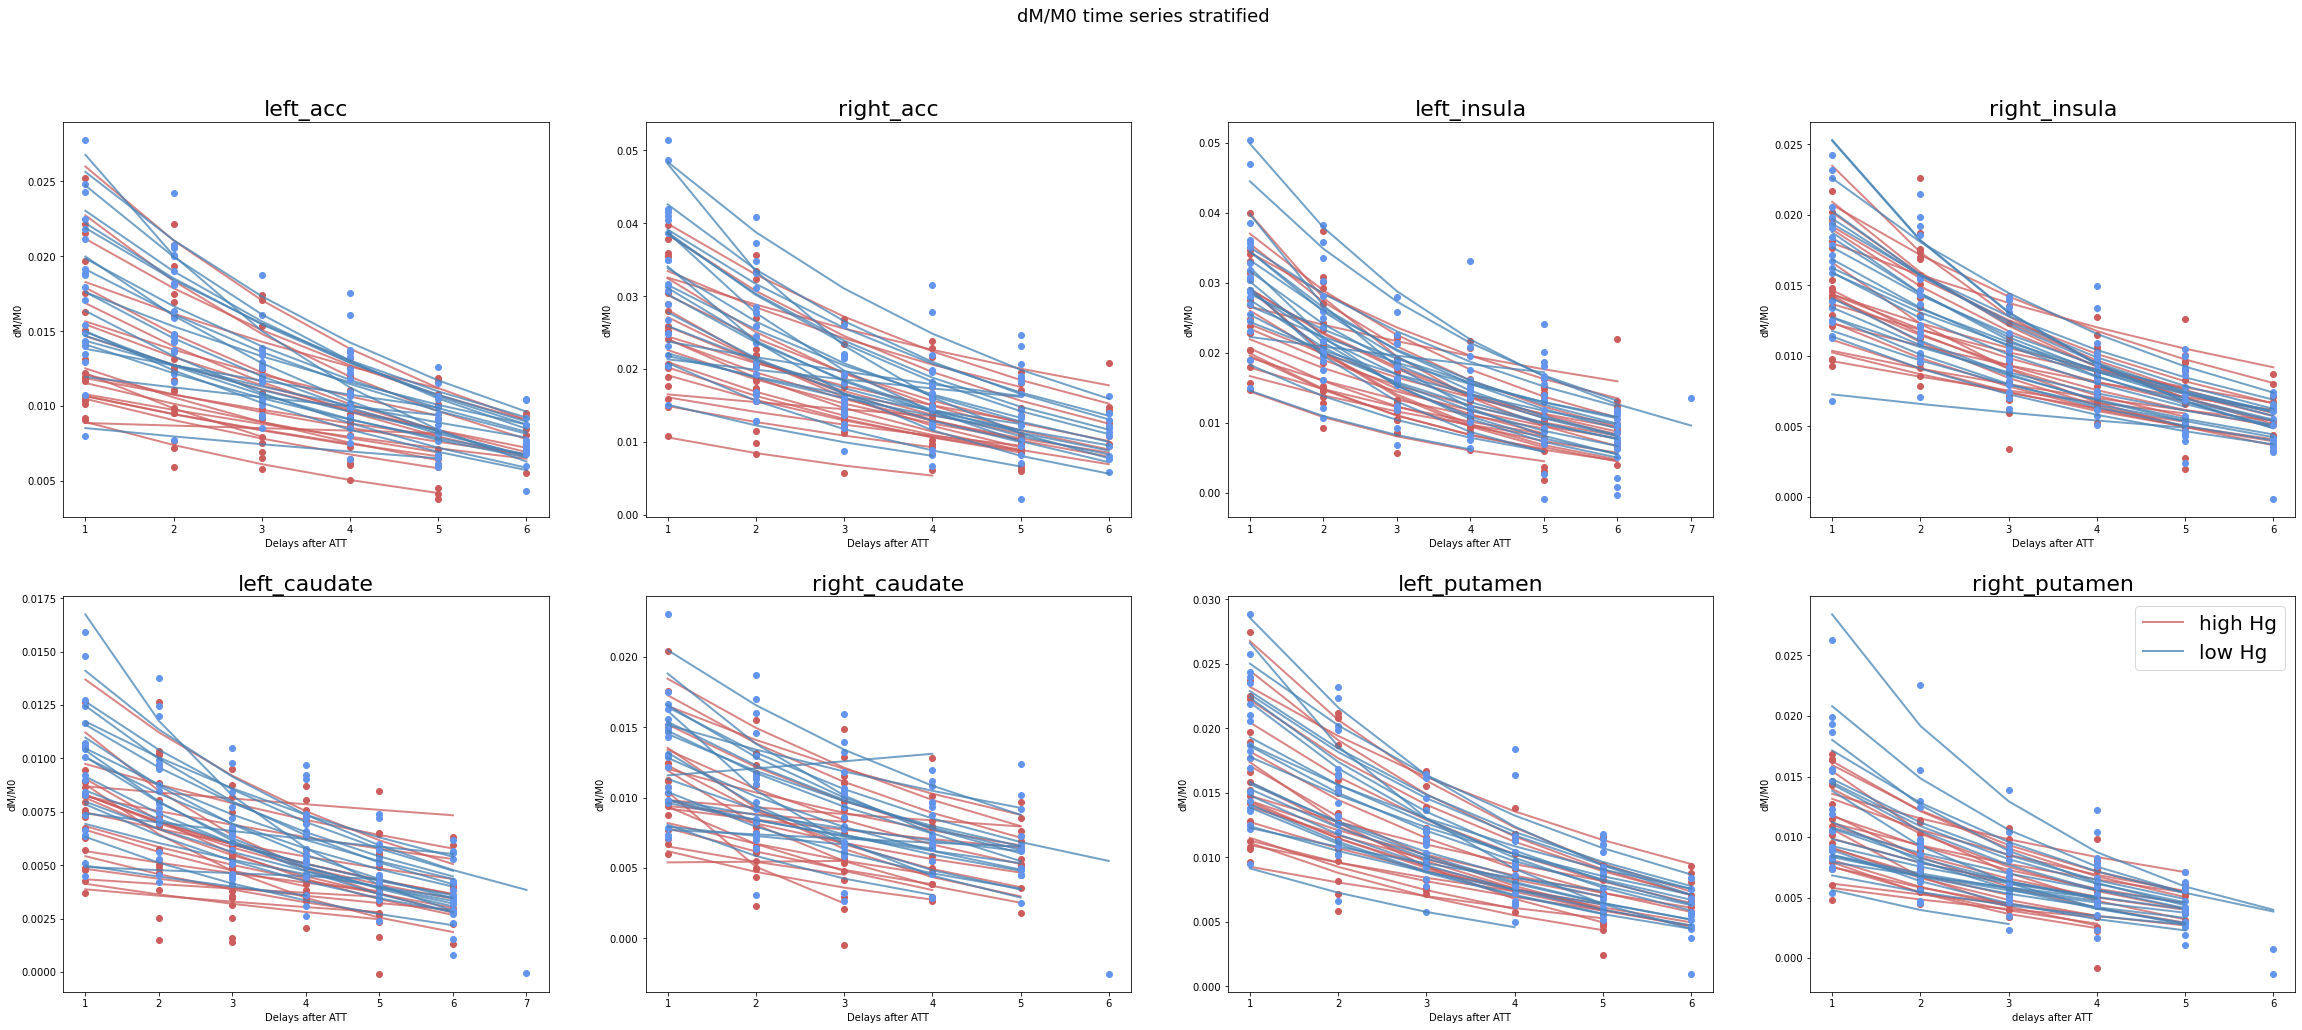

In [308]:
fig, axes = plt.subplots(2,4, figsize=(40,16))

timepoints = [1,2,3,4,5,6,7]
delays = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
rois = ['left_acc', 'right_acc', 'left_insula', 'right_insula', 'left_caudate', 'right_caudate', 'left_putamen', 'right_putamen']
result_df = pd.DataFrame(columns=["session_id","roi", "decay_rate","intercept","group"]) # init dataframe to store results

def monoExpZeroB(x, m, t):
    return m * np.exp(-t * x)

for i, ax in enumerate(fig.axes):
    if i < len(rois):
        roi = rois[i]
        for index, row in filt_df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]
            
            # curve fitting 
            ys = [x for x in data if np.isnan(x) == False] 
            xs = np.arange(1,len(ys)+1,1)

            # perform the fit using the function where B is 0
            p0 = (0.02, .3) # start with values near those we expect
            paramsB, cv = scipy.optimize.curve_fit(monoExpZeroB, xs, ys, p0)
            mB, tB = paramsB
            
            if row['group'] == 'high':
                ax.plot(timepoints, data, '.', markersize=12, label='high Hg', color='indianred')                
                ax.plot(xs, monoExpZeroB(xs, mB, tB), '-', linewidth=2, label='high Hg', alpha=0.75, color='indianred')
                
            elif row['group'] == 'low':
                ax.plot(timepoints, data, '.', markersize=12, label='low Hg', color='cornflowerblue')
                ax.plot(xs, monoExpZeroB(xs, mB, tB), '-', linewidth=2, label='low Hg', alpha=0.75, color='steelblue')
                
            # construct results dataframe
            result_dict = {'session_id':row.session_id, 'group': row.group, 'roi':roi,'decay_rate':np.round(tB,3), 'intercept':np.round(ys[0],3)}
            result_row = pd.Series(data=result_dict)
            result_df.loc[len(result_df)] = result_row

        ax.set_xlabel('Delays after ATT')
        ax.set_ylabel('dM/M0')
        ax.set_title(roi, fontsize=22)

        
        
plt.xlabel('delays after ATT')
fig.suptitle('dM/M0 time series stratified', fontsize=18)

#legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=20)

fname="../figs/dMM0_timeseries_stratified.png"
plt.savefig(fname, facecolor='white', edgecolor='none')

plt.show()

In [309]:
mB 

0.01578365257148241

In [311]:
ys[0]

0.011909

In [290]:
result_df

,session_id,roi,decay_rate,intercept,group
0,sub-HC026_ses-MR_BASELINE_,left_acc,0.152,0.013,high
1,sub-HC014_ses-MR_FOLLOWUP_,left_acc,0.210,0.025,high
2,sub-HC013_ses-MR_BASELINE_,left_acc,0.102,0.011,high
3,sub-HC013_ses-MR_FOLLOWUP_,left_acc,0.214,0.022,high
4,sub-HC021_ses-MR_FOLLOWUP_,left_acc,0.121,0.012,high
...,...,...,...,...,...
315,sub-HC006_ses-MR_BASELINE_,right_putamen,0.235,0.009,low
316,sub-HC017_ses-MR_FOLLOWUP_,right_putamen,0.154,0.007,low
317,sub-HC017_ses-MR_BASELINE_,right_putamen,0.287,0.016,low
318,sub-HC001_ses-MR_BASELINE_,right_putamen,0.260,0.011,low


Text(0.5, 1.0, 'Decay rate by ROI: high vs low Hb')

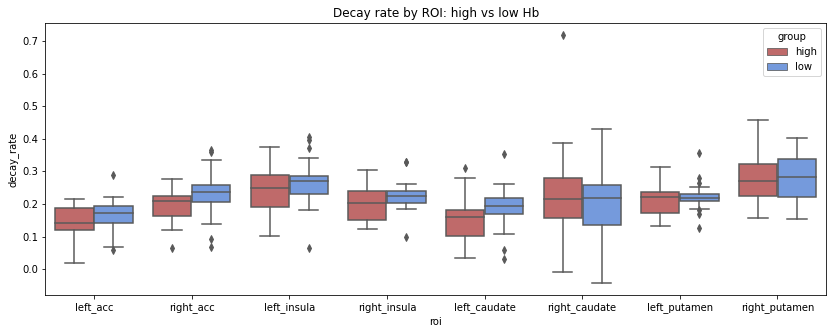

In [302]:
fig2, ax3 = plt.subplots(figsize=(14,5))
ax3 = sns.boxplot(x="roi", y="decay_rate", hue="group", data=result_df, palette=['indianred', 'cornflowerblue'])
plt.title("Decay rate by ROI: high vs low Hb")

Text(0.5, 1.0, 'Intercept by ROI: high vs low Hb')

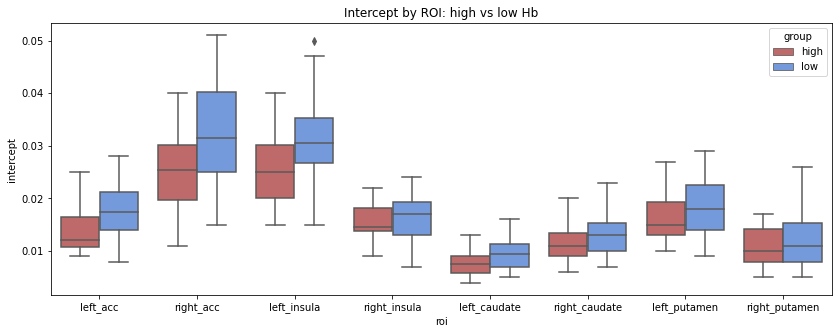

In [303]:
fig2, ax4 = plt.subplots(figsize=(14,5))
ax4 = sns.boxplot(x="roi", y="intercept", hue="group", data=result_df,  palette=['indianred', 'cornflowerblue'])
plt.title("Intercept by ROI: high vs low Hb")